In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

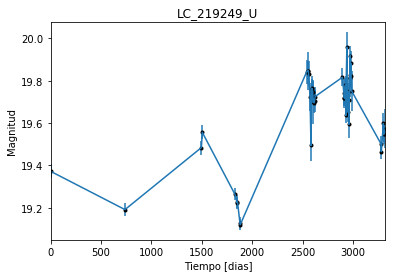

In [2]:
data = np.genfromtxt('LC_219249_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_219249_U')
plt.savefig("LC_219249_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

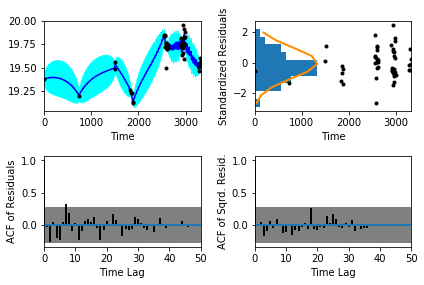

In [5]:
sample.assess_fit()

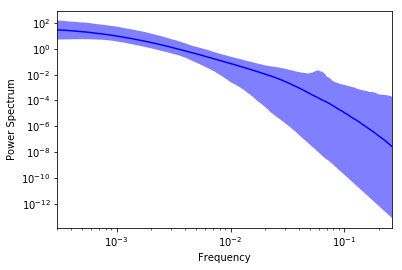

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

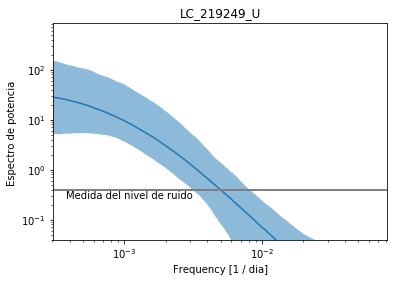

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_219249_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_219249_U')

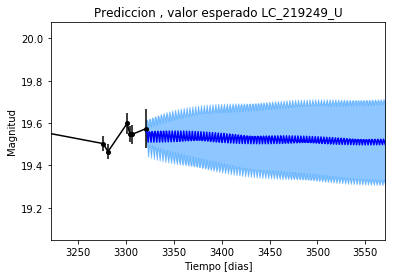

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_219249_U')

Text(0.5,1,'Prediccion, Caminos simulados LC_219249_U')

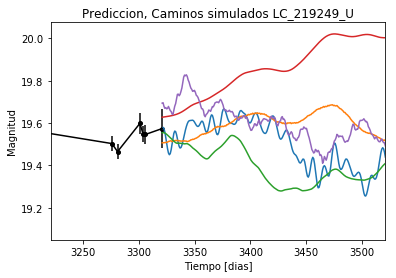

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_219249_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


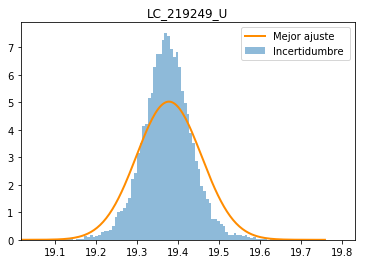

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_219249_U')
plt.savefig("Mejor_ajuste_LC_219249_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_219249_U')

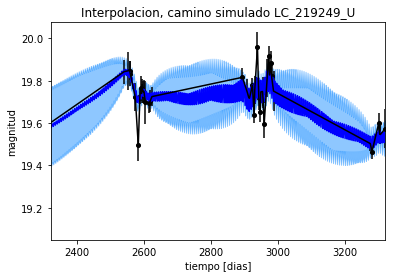

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_219249_U')

Text(0.5,1,'Interpolacion, camino simulado  LC_219249_U')

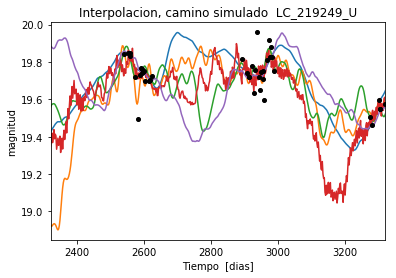

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado  LC_219249_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 530.83880392
Median: 0.0160250838404
Standard deviation: 0.108735461409
68% credibility interval: [ 0.00154321  0.15745205]
95% credibility interval: [ 0.00041581  0.40579824]
99% credibility interval: [  3.25903423e-04   4.98249135e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 600.170808592
Median: 0.00528736037631
Standard deviation: 0.0613179932378
68% credibility interval: [ 0.0006471   0.04358847]
95% credibility interval: [ 0.00034323  0.22491498]
99% credibility interval: [  3.07124640e-04   3.93016472e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 675.576695838
Median: 0.0371466567344
Standard deviation: 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 353.220673648
Median: 67.854540043
Standard deviation: 2.05781604736
68% credibility interval: [ 65.67676631  69.46761489]
95% credibility interval: [ 62.88064774  70.92478989]
99% credibility interval: [ 61.03988582  73.39588811]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 264.090738376
Median: 0.666228435468
Standard deviation: 1.37272116886
68% credibility interval: [ 0.10284156  2.73942182]
95% credibility interval: [ 0.02302527  4.74693127]
99% credibility interval: [ 0.01301457  6.51496384]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 697.328823768
Median: 0.563996503569
Standard deviation: 3.22697497357
68% credibility interval: [ 0.05138963  4.52651402]
95% credibility interval: [  3.60723620e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2547.70688797
Median: 2.15843141532e-25
Standard deviation: 1.88528268332e+89
68% credibility interval: [  2.77027440e-59   3.79666108e-05]
95% credibility interval: [  5.35474915e-79   4.35367450e+26]
99% credibility interval: [  4.97333464e-90   2.41152703e+77]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3129.72697658
Median: 19.4749611803
Standard deviation: 0.134227144499
68% credibility interval: [ 19.35461506  19.59014958]
95% credibility interval: [ 19.20387582  19.73596739]
99% credibility interval: [ 19.05687493  19.86842359]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 632.62101695
Median: 0.0463444016049
Standard deviation: 0.145791581379
68% credibility interval: [ 0.          0.29724927]
95% credibility interval: [ 0.          0.48506074]
99% credibility interval: [ 0.          0.51667935]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 632.62101695
Median: 0.0463444016049
Standard deviation: 0.145791581379
68% credibility interval: [ 0.          0.29724927]
95% credibility interval: [ 0.          0.48506074]
99% credibility interval: [ 0.          0.51667935]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2217.66223447
Median: 0.0
Standard deviation: 0.000449903868127
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 353.220673648
Median: 67.854540043
Standard deviation: 2.05781604736
68% credibility interval: [ 65.67676631  69.46761489]
95% credibility interval: [ 62.88064774  70.92478989]
99% credibility interval: [ 61.03988582  73.39588811]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2817.63153307
Median: 0.0687098729719
Standard deviation: 0.0938797367247
68% credibility interval: [ 0.04183263  0.12840543]
95% credibility interval: [ 0.02801806  0.29156942]
99% credibility interval: [ 0.02158798  0.56605907]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 864.997752983
Median: 1.18646862398
Standard deviation: 0.21407839627
68% credibility interval: [ 0.98355958  1.40788438]
95% credibility interval: [ 0.81947192  1.66056563]
99% credibility interval: [ 0.71658144  1.83060341]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 713.627074508
Median: 0.000905654074845
Standard deviation: 0.0618063688271
68% credibility interval: [  2.68129843e-05   1.86450478e-02]
95% credibility interval: [  4.61136511e-29   1.85324253e-01]
99% credibility interval: [  6.61400035e-81   3.93737967e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 530.83880392
Median: (-0.100688571332-2.68258897217j)
Standard deviation: 1.14275553936
68% credibility interval: [-0.98930043-0.39243464j -0.00969628-2.48622117j]
95% credibility interval: [-2.54970554+0.j         -0.00261263-2.07954461j]
99% credibility interval: [ -3.13059164e+00+0.j        -2.04771160e-03-1.670172j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 600.170808592
Median: (-0.0332214650302+0.757380555104j)
Standard deviation: 0.993758438302
68% credibility interval: [-0.27387443+1.22081084j -0.00406584+0.37180558j]
95% credibility interval: [-1.41318251+3.13240098j -0.00215660+0.j        ]
99% credibility interval: [ -2.46939532e+00+1.49295961j  -1.92972103e-03+1.71363139j]
Posterior summary for parame